In [1]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

##### Lets Build an LLM which has access to ARXIV tool, Wikipedia tool and Tavily tool. 
##### Then lets build a Langgraph which can use these and give results
##### We can try out different Agentic Patterns using the Langgraph 
##### Using ReAct Pattern

In [ ]:
#Arxiv tool
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max= 500,)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Query Arxiv Papers")
print(arxiv.name)

arxiv


In [ ]:
# Wikipedia tool
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=2, doc_content_chars_max= 500,)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
print(wiki.name)

wikipedia


In [4]:
wiki.invoke("Attention is all you need")

'Page: Attention Is All You Need\nSummary: "Attention Is All You Need" is a 2017 landmark research paper in machine learning authored by eight scientists working at Google. The paper introduced a new deep learning architecture known as the transformer, based on the attention mechanism proposed in 2014 by Bahdanau et al. It is considered a foundational paper in modern artificial intelligence, and a main contributor to the AI boom, as the transformer approach has become the main architecture of a wi'

In [5]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [6]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [ ]:
# Tavily tool
from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults()

In [8]:
tavily.invoke("Provide me the recent AI News")

[{'title': 'AI News | Latest AI News, Analysis & Events',
  'url': 'https://www.artificialintelligence-news.com/',
  'content': 'March 4, 2025\nAutoscience Carl: The first AI scientist writing peer-reviewed papers\nApplications\nMarch 3, 2025\nDeep Learning\nAlibaba Qwen QwQ-32B: Scaled reinforcement learning showcase\nArtificial Intelligence\nMarch 6, 2025\nDeepSeek-R1 reasoning models rival OpenAI in performance\nArtificial Intelligence\nJanuary 20, 2025\nNew AI training techniques aim to overcome current challenges\nDeep & Reinforcement Learning\nNovember 28, 2024 [...] AI News\nMarch 20, 2025\nUK minister in US to pitch Britain as global AI investment hub\n\nTelecoms Tech News\nMarch 20, 2025\nOfcom plans rules to drive UK full-fibre broadband to 96% coverage\n\nMarketing Tech News\nMarch 20, 2025\nOracle continues talks with White House to run TikTok\n\nMarketing Tech News\nMarch 19, 2025\nSocial media platforms face fines and criminal prosecution in UK\n\nAI News\nMarch 19, 2025\

In [9]:
tools = [arxiv, wiki, tavily]

#### Use Groq as it is free upto certain token limit. 

In [10]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="qwen-qwq-32b")

In [11]:
llm.invoke("what is AI")

AIMessage(content='\n<think>\nOkay, I need to explain what AI is. Let me start by recalling what I know. AI stands for Artificial Intelligence. But how do I define it properly? Maybe start with a simple definition first. It\'s the simulation of human intelligence in machines. But wait, that\'s pretty broad. I should break it down into key components.\n\nSo, AI involves tasks that typically require human intelligence, like learning, problem-solving, perception, and decision-making. But I should mention that it\'s done by machines. Maybe mention different types of AI, like narrow or general. Oh, right, there\'s the distinction between narrow (or weak) AI, which is designed for specific tasks, and general (or strong) AI, which can handle any intellectual task a human can. Though general AI isn\'t really here yet, right?\n\nExamples of narrow AI would be things like Siri, Alexa, recommendation systems on Netflix or Amazon. They do specific tasks really well but aren\'t sentient. Then there

In [12]:
llm_with_tools = llm.bind_tools(tools=tools)

In [13]:
llm_with_tools.invoke("What is the recent news on AI?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_7ym5', 'function': {'arguments': '{"query": "recent news on AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 166, 'prompt_tokens': 356, 'total_tokens': 522, 'completion_time': 0.420450016, 'prompt_time': 0.088402552, 'queue_time': 0.144419661, 'total_time': 0.508852568}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_07cd5d759a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-da7d752e-aeed-418d-b1ff-a97df537ba87-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent news on AI'}, 'id': 'call_7ym5', 'type': 'tool_call'}], usage_metadata={'input_tokens': 356, 'output_tokens': 166, 'total_tokens': 522})

In [14]:
llm_with_tools.invoke("What is the latest research on Quantum Computing?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5ez2', 'function': {'arguments': '{"query": "Quantum Computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 167, 'prompt_tokens': 357, 'total_tokens': 524, 'completion_time': 0.42501036, 'prompt_time': 0.060627954, 'queue_time': 2.1076340719999997, 'total_time': 0.485638314}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_07cd5d759a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-1baa64c9-276c-499f-91bb-a01d74216f59-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'Quantum Computing'}, 'id': 'call_5ez2', 'type': 'tool_call'}], usage_metadata={'input_tokens': 357, 'output_tokens': 167, 'total_tokens': 524})

## Workflow using Langgraph

In [15]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

In [17]:
class State(TypedDict) :
    messages: Annotated[list[AnyMessage], add_messages]
    #Append messages from either human or agents 


In [20]:
# Now adding LangGraph Nodes
from IPython.display import Image,display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


##### A Simple Workflow 

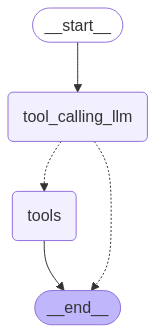

In [31]:
#Define a function which returns dictionary of messages from llm_with_tools

def tool_calling_llm(state:State):
    return {"messages" : [llm_with_tools.invoke(state["messages"])]}  

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edges

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm",
                              tools_condition)
builder.add_edge("tools", END)

#compile and display the graph
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [27]:
messages = graph.invoke({"messages":"What is finance planning?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is finance planning?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_wzc7)
 Call ID: call_wzc7
  Args:
    query: Financial planning
================================= Tool Message =================================
Name: wikipedia

Page: Financial plan
Summary: In general usage, a financial plan is a comprehensive evaluation of an individual's current pay and future financial state by using current known variables to predict future income, asset values and withdrawal plans.  This often includes a budget which organizes an individual's finances and sometimes includes a series of steps or specific goals for spending and saving in the future. This plan allocates future income to various types of expenses, such as rent or util


#### A ReAct Workflow. All you need to do is add an edge from Tools to Tool Calling LLM

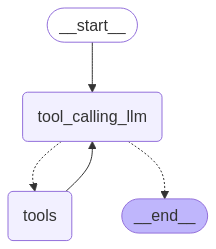

In [32]:
#Define a function which returns dictionary of messages from llm_with_tools

def tool_calling_llm(state:State):
    return {"messages" : [llm_with_tools.invoke(state["messages"])]}  

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edges

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm",
                              tools_condition)
builder.add_edge("tools", "tool_calling_llm")
#builder.add_edge("tools", END)

#compile and display the graph
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

### Here it just uses one tool and goes to End as it doesn't need any other tool

In [33]:
messages = graph.invoke({"messages":"What is the latest finance news?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the latest finance news?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_kb9z)
 Call ID: call_kb9z
  Args:
    query: latest finance news
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Finance News: Wall Street, financial markets, stocks, securities and ...", "url": "https://finance.yahoo.com/news/", "content": "### A jump in delinquencies in a corner of the mortgage market suggests first-time homebuyers may be struggling\nBusiness Insider • yesterday\n\n### Consumers might finally be accepting higher-for-longer mortgage rates\nYahoo Finance • yesterday\n\n### Mortgage and refinance rates today, February 7, 2025: Rate stability could make it a good time to buy\nYahoo Personal Finance • yesterday\nView More\nPersonal Finance [...] Finance Ne

### Lets Make it a bit more complicated. 
#### Lets ask it to search latest news and for the first one get the research paper and give out a one paragraph summary

In [34]:
messages = graph.invoke({"messages":"What is the Most used AI model in Finance? Give me a one para brief summary of the research paper on using the latest AI on Finance"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the Most used AI model in Finance? Give me a one para brief summary of the research paper on using the latest AI on Finance
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_qn5h)
 Call ID: call_qn5h
  Args:
    query: most used AI model in finance
  arxiv (call_bjvv)
 Call ID: call_bjvv
  Args:
    query: application of latest AI models in finance
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Top AI Tools for a Finance Professional", "url": "https://corporatefinanceinstitute.com/resources/career/ai-tools-for-a-finance-professional/", "content": "10 AI Tools for a Finance Professional\n\nThere are countless AI tools for finance that finance professionals everywhere are now incorporating into their daily work processes. 10 AI tools for financ